In [1]:
import pynini as pyn

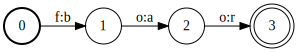

In [2]:
pyn.transducer("foo", "bar")

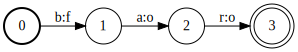

In [3]:
pyn.transducer("foo", "bar").invert()

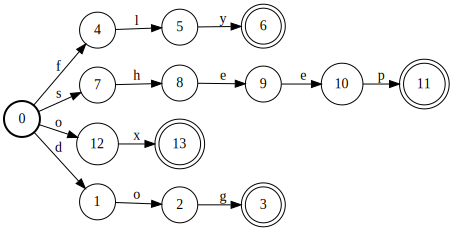

In [4]:
pyn.union("dog", "fly", "sheep", "ox").rmepsilon()

In [5]:
noun = pyn.union("dog", "fly", "sheep", "ox").rmepsilon()

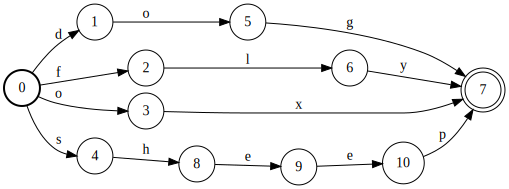

In [6]:
noun.optimize()

In [7]:
# Plural endings:

# -s (cats)
# -es when preceded by x and ch (e.g., axes, speeches)
# -en (ox, oxen)
# -zero plurals, optionally with stem changes (moose, sheep, goose, mouse, louse (singular lice))
# total irregularities: man/men, woman/women, child/children
# flies : fly + s (ie -> y)

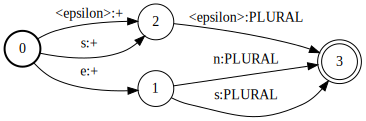

In [8]:
plural_suffix = pyn.union("s", "es", "en", "")
plural_tag = pyn.acceptor("+[PLURAL]")
plural = pyn.transducer(plural_suffix, plural_tag).optimize()
plural

In [9]:
analyzer = noun + plural
analyzer.optimize()
generator = pyn.invert(analyzer)
possible = "fly+[PLURAL]" @ generator
list(possible.paths().ostrings())

['fly', 'flyen', 'flyes', 'flys']

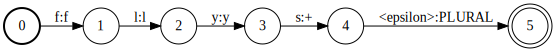

In [10]:
naive_analyzer = pyn.concat(noun, plural).optimize()
pyn.compose(pyn.acceptor("flys"), naive_analyzer)
"flys" @ naive_analyzer

In [11]:
analyses = pyn.project("flys" @ naive_analyzer, project_output = True)
analyses.stringify(token_type = "symbol")

'f l y + PLURAL'

In [12]:
def analyze(x: str):
    analyses = pyn.project(x @ naive_analyzer, project_output = True)
    return analyses.stringify(token_type = "symbol")

naive_generator = pyn.invert(naive_analyzer)

generations = "dog+[PLURAL]" @ naive_generator
list(generations.paths().ostrings())

['dog', 'dogen', 'doges', 'dogs']

In [13]:
s_plural_noun = pyn.union("dog", "table")
s_plural = pyn.transducer("s", "+ [PLURAL]"")
s_plural_lexicon = s_plural_noun + s_plural
                          
zero_plural_noun = pyn.union("sheep", "mouse", "moose")
zero_plural = pyn.transducer("", "+ [PLURAL]"") 
zero_plural_lexicon = zero_plural_noun + zero_plural

en_plural_noun = pyn.union()                            

SyntaxError: EOL while scanning string literal (<ipython-input-13-0e4d46f1f6a3>, line 2)

In [ ]:
a2b = pyn.transducer("a", "b")

phi = pyn.union("a", "b")
psi = pyn.acceptor("b")
tau = pyn.transducer(phi, psi).optimize()
tau

In [ ]:
sigstar = pyn.union("a", "b", "c").closure()
sigstar.optimize()

In [ ]:
(sigstar + a2b + sigstar).optimize()


In [ ]:
containment = (sigstar + pyn.closure(a2b, 0, 1) + sigstar).optimize()
"cacab" @ containment

In [ ]:
a2b_rule = pyn.cdrewrite(a2b, "", "", sigstar)
a2b_rule.optimize()

In [ ]:
("cacacacb" @ a2b_rule).stringify()

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stem = SnowballStemmer("english").stem

In [ ]:
stem("matte") 

In [ ]:
import nltk
nltk.download("wordnet")

In [ ]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer().lemmatize

lemm("am", pos="v") #pos = v (verb) or pos = n (noun), part of speech tags

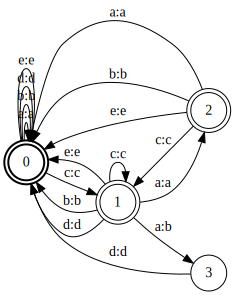

In [18]:
# here is a rule: a -> b/c_d, thus cad: a -> c_d, becoming cbd

sigma_star = pyn.union("a", "b", "c", "d", "e").closure().optimize() #sigma_star is our alphabet.
tau = pyn.transducer("a", "b") #tau is the transducer.
#tau
rule = pyn.cdrewrite(tau, "c", "d", sigma_star).optimize() #this is our rule: a -> b/c_d.
rule

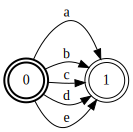

In [45]:
# this is what it looks like with applying .closure().optimize()

sigma_star = pyn.union("a", "b", "c", "d", "e")
tau = pyn.transducer("a", "b") #tau is the transducer. a -> b. 
#tau
rule = pyn.cdrewrite(tau, "c", "d", sigma_star).optimize() #this is our rule: a -> b/c_d.
rule

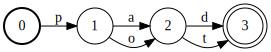

In [40]:
# Using concat instead of union. 

s1 = pyn.acceptor("p")
s2 = pyn.union("a", "o")
s3 = pyn.union("d","t")

concat_s = (s1 + s2 + s3).optimize()
concat_s

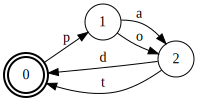

In [41]:
# pad or pod. 

s1 = pyn.acceptor("p")
s2 = pyn.union("a", "o")
s3 = pyn.union("d","t")

fsa = (s1 + s2 + s3).closure().optimize()
fsa

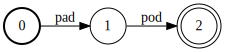

In [42]:
ss = pyn.acceptor("[pad][pod]")
ss

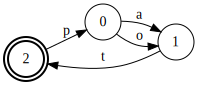

In [43]:
tau = pyn.transducer("a", "b")
rule = pyn.cdrewrite(tau, "p", "d", fsa)
rule

In [47]:
# this funciton takes a str and a rule, and returns the output after applying the rule to the str. 

def apply(string: str, rule: pyn.Fst):
    return (string @ rule).stringify() # rule applies to string by using @.

sigma_star = pyn.union("a", "b", "c", "d", "e").closure().optimize()
tau = pyn.transducer("a", "b") #tau is the transducer. a -> b
rule = pyn.cdrewrite(tau, "c", "d", sigma_star).optimize() #this is our rule: a -> b/c_d.

print(apply("cad", rule))
print(apply("cab", rule))

cbd
cab


In [48]:
import string

string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

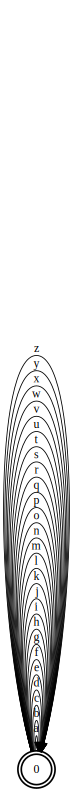

In [53]:
sigma_star= pyn.union(*string.ascii_lowercase).closure().optimize()
sigma_star

In [54]:
rule_form1=pyn.cdrewrite(pyn.transducer("ise","ize"),
                        "",
                        "[EOS]",
                        sigma_star).optimize()

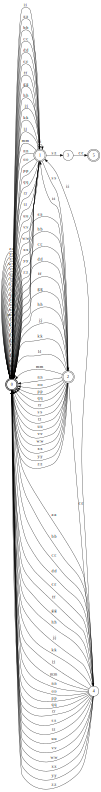

In [55]:
rule_form1

In [56]:
apply("colorise",rule_form1)

'colorize'

In [58]:
apply("rise",rule_form1)

'rize'

In [59]:
rule_form2=pyn.cdrewrite(pyn.transducer("s","z"),
                        "i",
                        "e",
                        sigma_star).optimize()

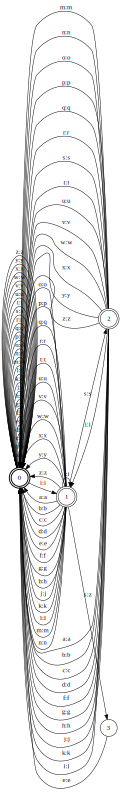

In [60]:
rule_form2

In [61]:
apply("optimise",rule_form2)

'optimize'

In [62]:
apply("optimiser",rule_form2)

'optimizer'

In [63]:
add_d=pyn.cdrewrite(pyn.transducer("","d"),
                   "",
                   "[EOS]", #end of sentence.
                   sigma_star).optimize()

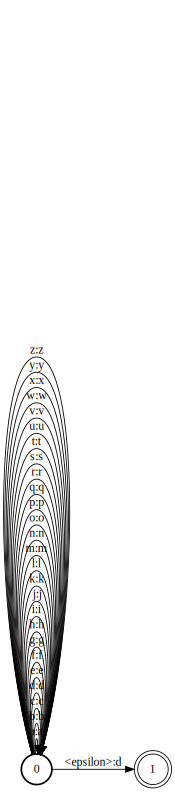

In [66]:
add_d

In [72]:
("realise" @ rule_form1 @ add_d).stringify()

'realized'

In [73]:
#order of the rules matter
("realise"  @ add_d @ rule_form1).stringify()

'realised'

In [83]:
# Rule: adding "ing" to words:

vowels = pyn.union("a", "e", "i", "o", "u")

rule_ing =pyn.cdrewrite(pyn.transducer(pyn.union("", vowels) ,"ing"),
                        "",
                        "[EOS]",
                        sigma_star).optimize()

("cheer" @ rule_ing).stringify()

'cheering'